In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb 
from matplotlib import pyplot as plt

In [7]:
data=pd.read_csv(r"C:\Users\Shubh_Ram\Dropbox\My PC (LAPTOP-F3BSREE1)\Desktop\Online_ML_DataSets\Wholesalecustomersdata.csv")

In [8]:
data.shape

(440, 8)

In [9]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [10]:
cat_feature=['Channel','Region']
con_feat=["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]

In [11]:
for col in cat_feature:
    dummies=pd.get_dummies(data[col],prefix=col)
    data=pd.concat([data,dummies],axis=1)
    data.drop(col,axis=1,inplace=True)

In [12]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [13]:
from sklearn.cluster import KMeans


In [14]:
sum_of_squared_error=[]
kk=range(1,15)
for k in kk:
    km=KMeans(n_clusters=k)
    km=km.fit(data)
    sum_of_squared_error.append(km.inertia_)

C:\Users\Shubh_Ram\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


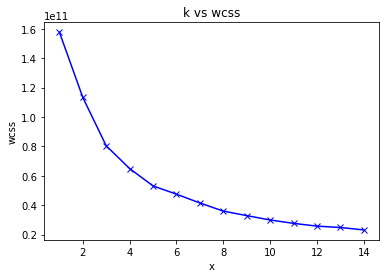

In [17]:
plt.plot(kk,sum_of_squared_error,'bx-')
plt.xlabel("x")
plt.ylabel("wcss")
plt.title("k vs wcss")
plt.show()

In [18]:
model_km=KMeans(n_clusters=5)
model_km=model_km.fit(data)

In [21]:
#model_km.cluster_centers_[0]

In [22]:
data["Cluster"]=model_km.labels_

In [26]:
data.head(1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3,Cluster
0,12669,9656,7561,214,2674,1338,0,1,0,0,1,1


In [25]:
def corrWith(f1,f2,yourdata,hueVal="No"):
    if hueVal=="No":
        sb.lmplot(f1,f2,data=yourdata,fit_reg=True,scatter_kws={"s":200})
        plt.title("Corr plot between {} and {}".format(f1,f2))
        plt.xlabel(f1)
        plt.ylabel(f2)
        plt.show()
    else:
        sb.lmplot(f1,f2,data=yourdata,fit_reg=False,scatter_kws={"s":200},hue=hueVal)
        plt.title("Corr plot between {} and {}".format(f1,f2))
        plt.xlabel(f1)
        plt.ylabel(f2)
        plt.show()
        
   

C:\Users\Shubh_Ram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


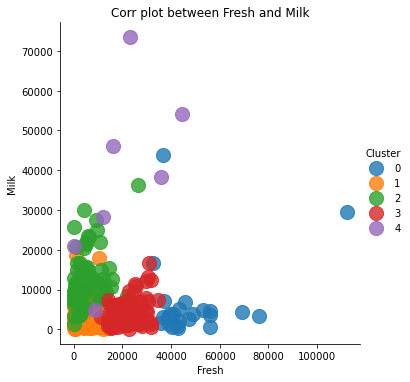

In [27]:
corrWith("Fresh","Milk",data,hueVal="Cluster")